# Midterm project

In [1]:
%matplotlib inline
import pandas as pd
from sklearn import tree
from assets.treeviz import tree_print
from sklearn.metrics import accuracy_score
import seaborn as sns

# I. Data set

### I choose to use the data set credit_predict.csv that was provided.

In [2]:
credit_df = pd.read_csv('./assets/credit_predict.csv')

# II. Preliminary analysis

In [3]:
credit_df.head()

,Income,Limit,Cards,Age,Education,Gender_Val,Rating_Label
0,14.891,3606,2,34,11,0,poor
1,106.025,6645,3,82,15,1,poor
2,104.593,7075,4,71,11,0,poor
3,148.924,9504,3,36,11,1,fair
4,55.882,4897,2,68,16,0,poor


In [4]:
row, col = credit_df.shape

In [5]:
print(f'There are {col} columns in the credit_predict data set.')
print(f'Since there is only one target dataset, it means that there are {col-1} independent variables.')

There are 7 columns in the credit_predict data set.
Since there is only one target dataset, it means that there are 6 independent variables.


In [6]:
credit_features = credit_df.drop('Rating_Label', axis=1)

In [7]:
credit_target = pd.DataFrame(credit_df['Rating_Label'])

In [8]:
credit_features.head()

,Income,Limit,Cards,Age,Education,Gender_Val
0,14.891,3606,2,34,11,0
1,106.025,6645,3,82,15,1
2,104.593,7075,4,71,11,0
3,148.924,9504,3,36,11,1
4,55.882,4897,2,68,16,0


In [9]:
credit_target.head()

,Rating_Label
0,poor
1,poor
2,poor
3,fair
4,poor


In [10]:
print("These are the min of the independent variables")
credit_features.min()

These are the min of the independent variables


Income         10.354
Limit         855.000
Cards           1.000
Age            23.000
Education       5.000
Gender_Val      0.000
dtype: float64

In [11]:
print("These are the max of the independent variables")
credit_features.max()

These are the max of the independent variables


Income          186.634
Limit         13913.000
Cards             9.000
Age              98.000
Education        20.000
Gender_Val        1.000
dtype: float64

In [12]:
print("These are the mean of the independent variables")
credit_features.mean()

These are the mean of the independent variables


Income          45.218885
Limit         4735.600000
Cards            2.957500
Age             55.667500
Education       13.450000
Gender_Val       0.517500
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED44196CC8>,
      dtype=object)

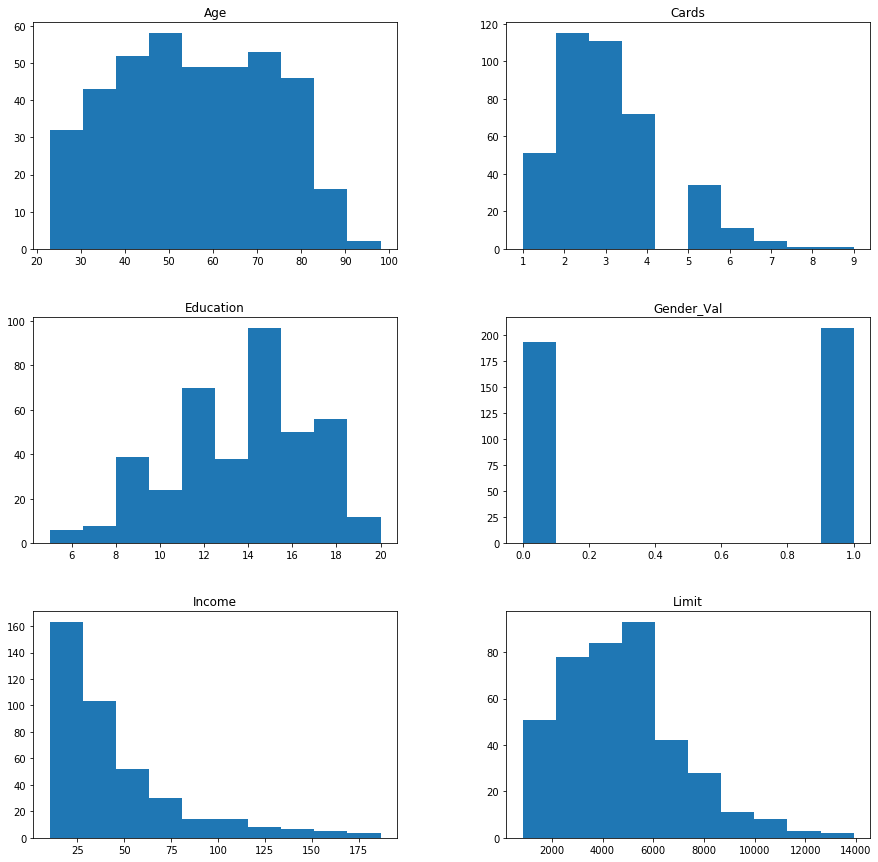

In [13]:
credit_features.hist(figsize=(15,15),grid=False)

The variable Age looks more unimodal than multimodal, so I have to say that it is not multimodal. 
the variable Cards is multimodal. 
The variable Education is multimodal. 
The variable Gender_Val is multimodal.
The variable Income is not multimodal.
The variable Limit is not multimodal.

In [14]:
labels = []
for row in credit_target.index:
    if credit_target['Rating_Label'][row] not in labels:
        labels+=[credit_target['Rating_Label'][row]]

In [17]:
print(f'There are {len(labels)} different labels in the dependent variable "Rating_Label" ')

There are 4 different labels in the dependent variable "Rating_Label" 


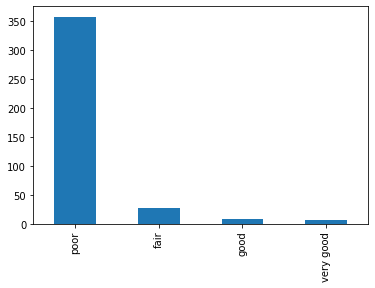

In [19]:
credit_target.loc[:,'Rating_Label'].value_counts().plot.bar()

This is not a balanced classification problem because of the distribution of the different labels are not balanced because there are over 300 instances of poor label, while all the other labels have under 50 instances.

# III. Model building